# 📊 Análisis Exploratorio de Datos (EDA)
## GateGroup Airlines - Datos de Vuelos y Ventas

**Objetivo:** Explorar y analizar los datos limpios de vuelos y ventas para identificar patrones, tendencias y obtener insights valiosos.

**Dataset:** `cleaned_data_combined.csv`  
**Período:** Enero - Agosto 2025  
**Registros:** ~1.3 millones de transacciones

## 1. Importar Librerías Necesarias

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar tamaño de gráficos
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Librerías importadas correctamente")

ModuleNotFoundError: No module named 'seaborn'

## 2. Cargar el Dataset Limpio

In [ ]:
# Cargar datos
df = pd.read_csv(r'Data\Clean\cleaned_data_combined.csv')

# Convertir fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

print(f"📊 Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"\nPrimeras 5 filas:")
df.head()

📊 Dataset cargado exitosamente
Dimensiones: 1,293,077 filas x 17 columnas

Primeras 5 filas:


,flight_key,passengers,nombre_de_aerolinea,fecha,origen,destino,flight_no,departute_local_time,arrival_local_time,sales,type_transaction,category,supercategory,lost_sales,item_code,currency,warehouse
0,GGALISDU54720250429,102,GateGroup Airlines,2025-04-29,LIS,DUS,547,2025-04-29 14:30:00,2025-04-29 18:34:00,1.0,SALE,Sweet Snacks,BISTRO,0,4702.0,EUR,Lisbon
1,GGAGVALI94620250309,197,GateGroup Airlines,2025-03-09,GVA,LIS,946,2025-03-09 14:37:00,2025-03-09 16:25:00,3.0,SALE,Sweet Snacks,BISTRO,0,4702.0,EUR,Lisbon
2,GGABERLI54020250413,173,GateGroup Airlines,2025-04-13,BER,LIS,540,2025-04-13 06:40:00,2025-04-13 09:32:00,2.0,SALE,Cold Drink,BISTRO,0,4561.0,EUR,Lisbon
3,GGATERLI182920250106,157,GateGroup Airlines,2025-01-06,TER,LIS,1829,2025-01-06 13:44:00,2025-01-06 16:57:00,1.0,SALE,Savoury Snacks,BISTRO,0,4728.0,EUR,Lisbon
4,GGAMUCLI56020250129,111,GateGroup Airlines,2025-01-29,MUC,LIS,560,2025-01-29 17:27:00,2025-01-29 19:46:00,1.0,SALE,Sweet Snacks,BISTRO,0,4702.0,EUR,Lisbon


## 3. Información Básica del Dataset

In [ ]:
# Información del dataset
print("="*80)
print("INFORMACIÓN DEL DATASET")
print("="*80)
df.info()

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293077 entries, 0 to 1293076
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   flight_key            1293077 non-null  object        
 1   passengers            1293077 non-null  int64         
 2   nombre_de_aerolinea   1293077 non-null  object        
 3   fecha                 1293077 non-null  datetime64[ns]
 4   origen                1293077 non-null  object        
 5   destino               1293077 non-null  object        
 6   flight_no             1293077 non-null  object        
 7   departute_local_time  1293077 non-null  object        
 8   arrival_local_time    1293077 non-null  object        
 9   sales                 1293077 non-null  float64       
 10  type_transaction      1293077 non-null  object        
 11  category              1293077 non-null  object        
 12  supercategory     

In [ ]:
# Columnas disponibles
print("📋 Columnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

📋 Columnas del dataset:
 1. flight_key
 2. passengers
 3. nombre_de_aerolinea
 4. fecha
 5. origen
 6. destino
 7. flight_no
 8. departute_local_time
 9. arrival_local_time
10. sales
11. type_transaction
12. category
13. supercategory
14. lost_sales
15. item_code
16. currency
17. warehouse


## 4. Verificar Valores Nulos y Calidad de Datos

In [ ]:
# Verificar valores nulos
null_counts = df.isnull().sum()
print("✅ VERIFICACIÓN DE CALIDAD DE DATOS")
print(f"\nTotal de valores nulos: {null_counts.sum()}")
print(f"Duplicados: {df.duplicated().sum()}")

if null_counts.sum() == 0:
    print("\n🎉 ¡Excelente! No hay valores nulos en el dataset.")
else:
    print("\n❌ Valores nulos por columna:")
    print(null_counts[null_counts > 0])

✅ VERIFICACIÓN DE CALIDAD DE DATOS

Total de valores nulos: 0
Duplicados: 0

🎉 ¡Excelente! No hay valores nulos en el dataset.


## 5. Resumen Estadístico

In [ ]:
# Estadísticas descriptivas de variables numéricas
print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
df.describe().round(2)

📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,passengers,fecha,sales,lost_sales,item_code
count,1293077.00,1293077,1293077.00,1293077.00,1293077.00
mean,169.81,2025-05-05 22:04:39.792154368,1.23,0.20,4704.60
min,3.00,2025-01-01 00:00:00,0.00,0.00,4450.00
25%,129.00,2025-03-08 00:00:00,1.00,0.00,4585.00
50%,157.00,2025-05-09 00:00:00,1.00,0.00,4675.00
75%,187.00,2025-07-05 00:00:00,1.00,0.00,4728.00
max,365.00,2025-08-30 00:00:00,200.00,70.00,5112.00
std,66.85,NaN,0.75,1.25,163.63


In [ ]:
# Estadísticas de variables categóricas
print("📊 VARIABLES CATEGÓRICAS - VALORES ÚNICOS")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  - Valores únicos: {unique_count}")
    if unique_count <= 10:
        print(f"  - Top valores:")
        display(df[col].value_counts().head())

📊 VARIABLES CATEGÓRICAS - VALORES ÚNICOS

flight_key:
  - Valores únicos: 80671

nombre_de_aerolinea:
  - Valores únicos: 1
  - Top valores:


nombre_de_aerolinea
GateGroup Airlines    1293077
Name: count, dtype: int64


origen:
  - Valores únicos: 86

destino:
  - Valores únicos: 92

flight_no:
  - Valores únicos: 600

departute_local_time:
  - Valores únicos: 68702

arrival_local_time:
  - Valores únicos: 69686

type_transaction:
  - Valores únicos: 4
  - Top valores:


type_transaction
SALE      1247417
Comp        38304
VOIDED       7354
REFUND          2
Name: count, dtype: int64


category:
  - Valores únicos: 15

supercategory:
  - Valores únicos: 3
  - Top valores:


supercategory
BISTRO       1247344
BOUTIQUE       41271
DUTY FREE       4462
Name: count, dtype: int64


currency:
  - Valores únicos: 1
  - Top valores:


currency
EUR    1293077
Name: count, dtype: int64


warehouse:
  - Valores únicos: 4
  - Top valores:


warehouse
Lisbon               780661
Madrid               435278
Porto                 59781
Palma de Mallorca     17357
Name: count, dtype: int64

## 6. Análisis Temporal

In [ ]:
# Rango de fechas
print(f"📅 Rango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Período total: {(df['fecha'].max() - df['fecha'].min()).days} días")

# Crear columnas temporales
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['semana'] = df['fecha'].dt.isocalendar().week
df['dia'] = df['fecha'].dt.day
df['mes_nombre'] = df['fecha'].dt.strftime('%B')
df['dia_semana'] = df['fecha'].dt.day_name()
df['dia_semana_num'] = df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo

print("\n✅ Columnas temporales creadas:")
print(f"  - año: Año ({df['año'].nunique()} únicos)")
print(f"  - mes: Mes del año (1-12)")
print(f"  - semana: Semana del año (1-52)")
print(f"  - dia: Día del mes (1-31)")
print(f"  - mes_nombre: Nombre del mes")
print(f"  - dia_semana: Nombre del día (Lunes-Domingo)")
print(f"  - dia_semana_num: Número del día (0-6)")

# Mostrar ejemplo
print("\n📋 Ejemplo de las primeras filas:")
display(df[['fecha', 'año', 'mes', 'semana', 'dia', 'mes_nombre', 'dia_semana']].head())

📅 Rango de fechas: 2025-01-01 00:00:00 a 2025-08-30 00:00:00
Período total: 241 días

✅ Columnas temporales creadas:
  - año: Año (1 únicos)
  - mes: Mes del año (1-12)
  - semana: Semana del año (1-52)
  - dia: Día del mes (1-31)
  - mes_nombre: Nombre del mes
  - dia_semana: Nombre del día (Lunes-Domingo)
  - dia_semana_num: Número del día (0-6)

📋 Ejemplo de las primeras filas:


,fecha,año,mes,semana,dia,mes_nombre,dia_semana
0,2025-04-29,2025,4,18,29,April,Tuesday
1,2025-03-09,2025,3,10,9,March,Sunday
2,2025-04-13,2025,4,15,13,April,Sunday
3,2025-01-06,2025,1,2,6,January,Monday
4,2025-01-29,2025,1,5,29,January,Wednesday


In [ ]:
# Ventas por mes
ventas_por_mes = df.groupby('mes').agg({
    'sales': 'sum',
    'passengers': 'sum',
    'flight_key': 'count'
}).rename(columns={'flight_key': 'num_transacciones'})

print("📊 VENTAS Y PASAJEROS POR MES:")
print(ventas_por_mes)

📊 VENTAS Y PASAJEROS POR MES:
        sales  passengers  num_transacciones
mes                                         
1    183765.0    24454557             150608
2    166577.0    22312730             136377
3    187872.0    25256731             153270
4    201735.0    27963357             160863
5    212524.0    29058768             171256
6    205185.0    28922778             167638
7    232743.0    32735773             187287
8    206026.0    28874864             165778


## 7. Visualizaciones - Distribuciones

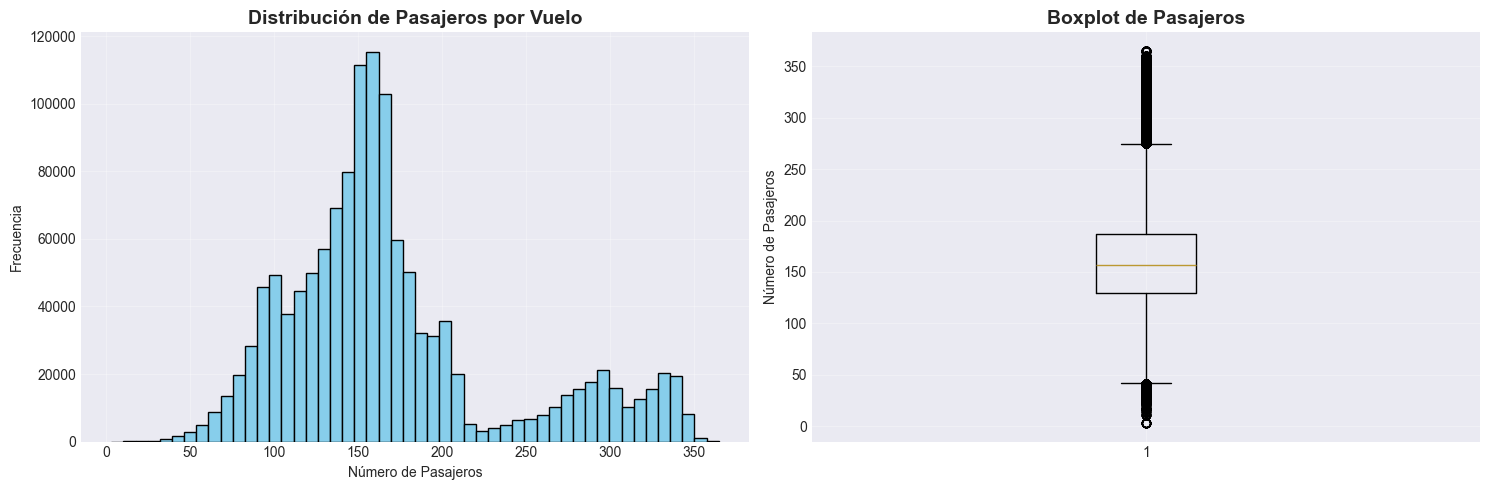

In [ ]:
# Distribución de pasajeros
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['passengers'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Pasajeros por Vuelo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Pasajeros')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['passengers'])
axes[1].set_title('Boxplot de Pasajeros', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Número de Pasajeros')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

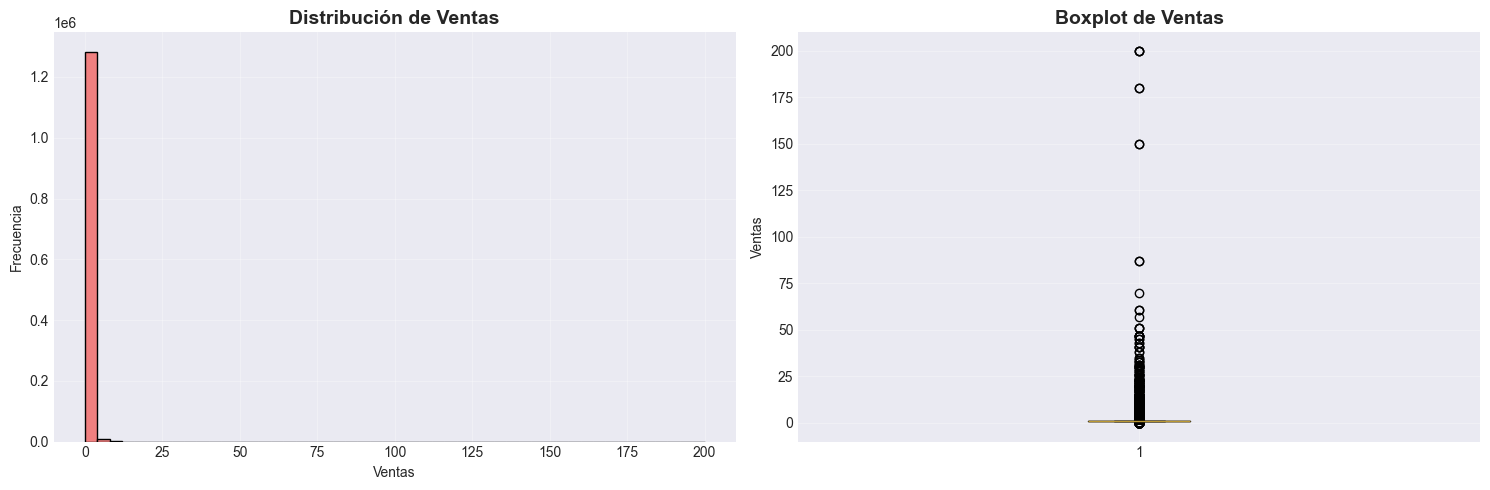

In [ ]:
# Distribución de ventas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['sales'], bins=50, color='lightcoral', edgecolor='black')
axes[0].set_title('Distribución de Ventas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ventas')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['sales'])
axes[1].set_title('Boxplot de Ventas', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Ventas')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Visualizaciones - Análisis Temporal

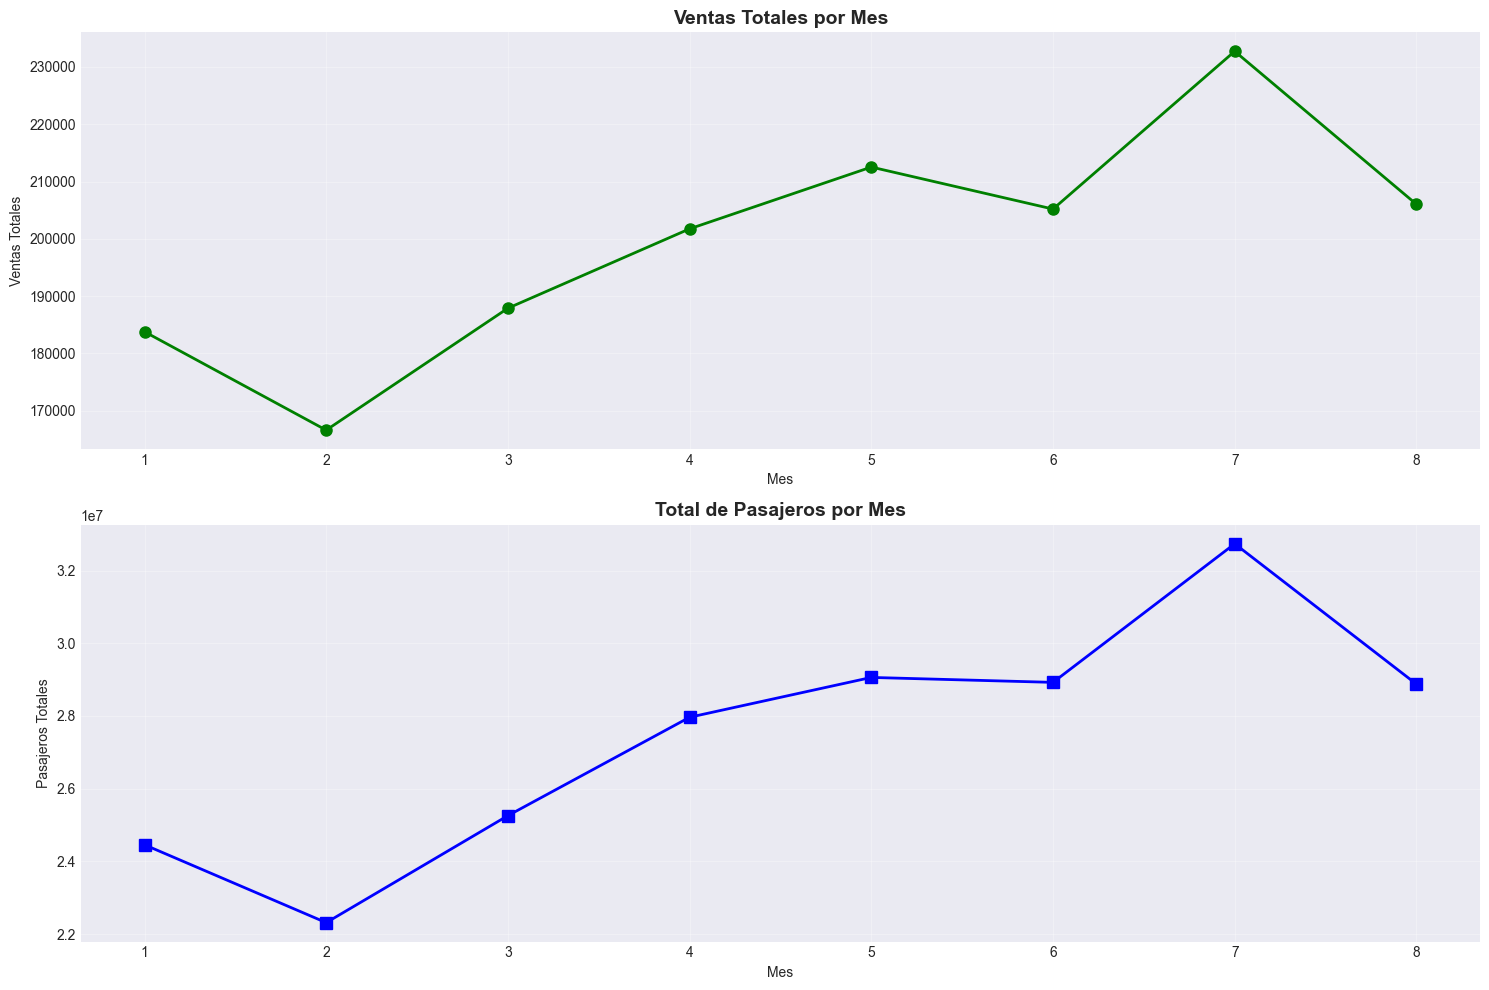

In [ ]:
# Ventas y pasajeros por mes
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Ventas por mes
ventas_mes = df.groupby('mes')['sales'].sum()
axes[0].plot(ventas_mes.index, ventas_mes.values, marker='o', linewidth=2, markersize=8, color='green')
axes[0].set_title('Ventas Totales por Mes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Ventas Totales')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 9))

# Pasajeros por mes
pasajeros_mes = df.groupby('mes')['passengers'].sum()
axes[1].plot(pasajeros_mes.index, pasajeros_mes.values, marker='s', linewidth=2, markersize=8, color='blue')
axes[1].set_title('Total de Pasajeros por Mes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Pasajeros Totales')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 9))

plt.tight_layout()
plt.show()

## 9. Análisis por Categorías

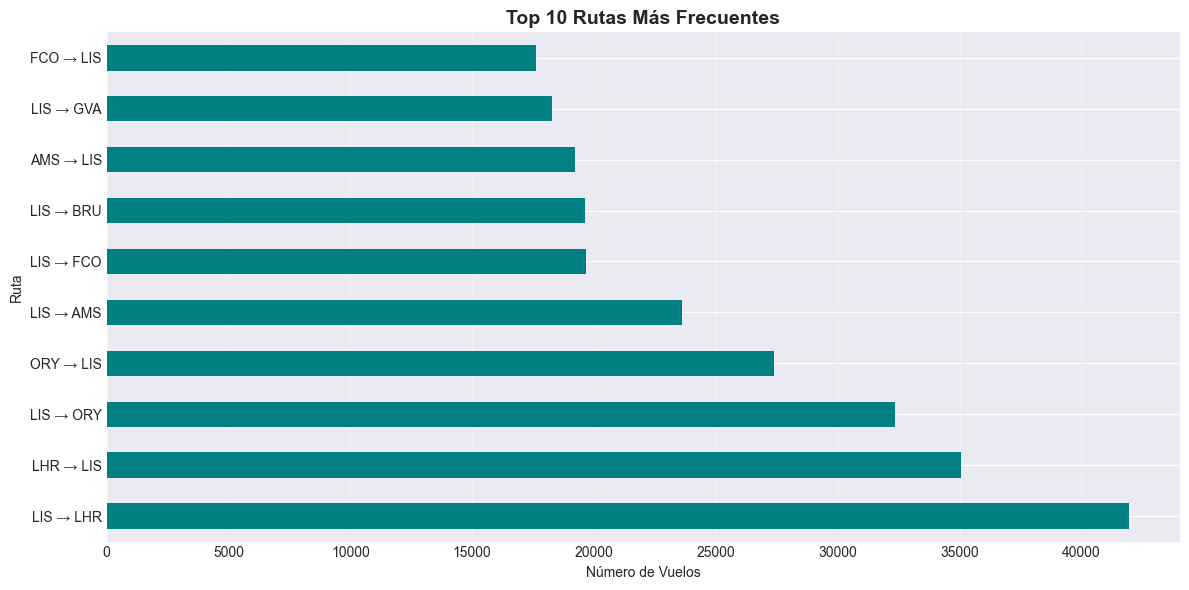


📍 Top 10 Rutas:
ruta
LIS → LHR    41948
LHR → LIS    35079
LIS → ORY    32361
ORY → LIS    27369
LIS → AMS    23591
LIS → FCO    19685
LIS → BRU    19645
AMS → LIS    19212
LIS → GVA    18292
FCO → LIS    17635
Name: count, dtype: int64


In [ ]:
# Top 10 rutas más populares
df['ruta'] = df['origen'] + ' → ' + df['destino']
top_rutas = df['ruta'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_rutas.plot(kind='barh', color='teal')
plt.title('Top 10 Rutas Más Frecuentes', fontsize=14, fontweight='bold')
plt.xlabel('Número de Vuelos')
plt.ylabel('Ruta')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n📍 Top 10 Rutas:")
print(top_rutas)

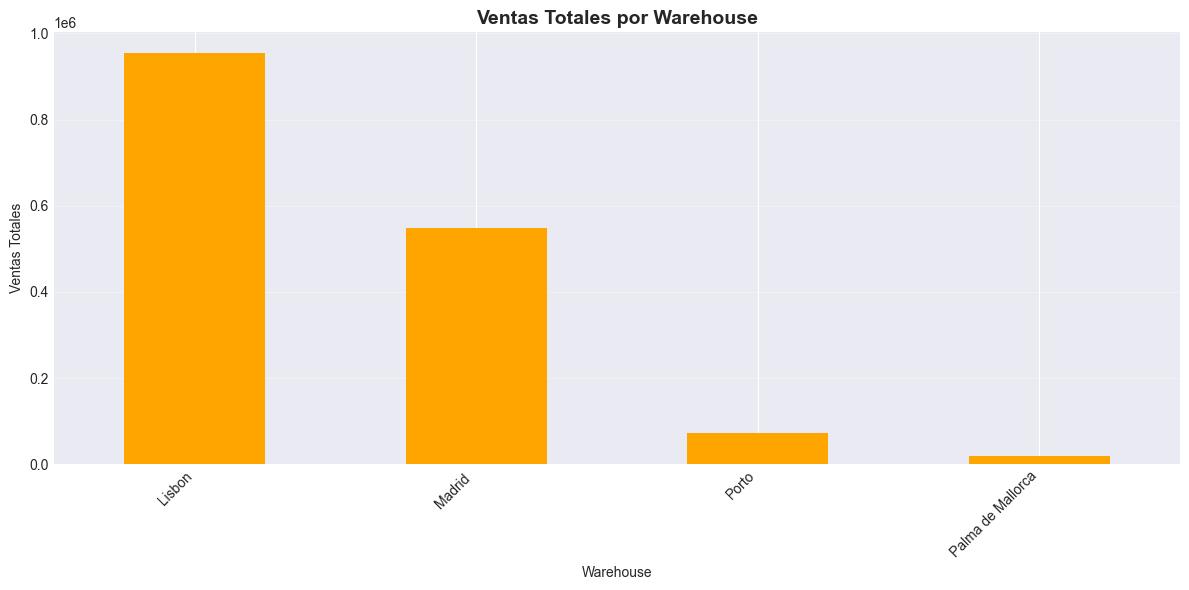


🏪 Ventas por Warehouse:
warehouse
Lisbon               954610.0
Madrid               548944.0
Porto                 72727.0
Palma de Mallorca     20146.0
Name: sales, dtype: float64


In [ ]:
# Ventas por warehouse
ventas_warehouse = df.groupby('warehouse')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ventas_warehouse.plot(kind='bar', color='orange')
plt.title('Ventas Totales por Warehouse', fontsize=14, fontweight='bold')
plt.xlabel('Warehouse')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n🏪 Ventas por Warehouse:")
print(ventas_warehouse)

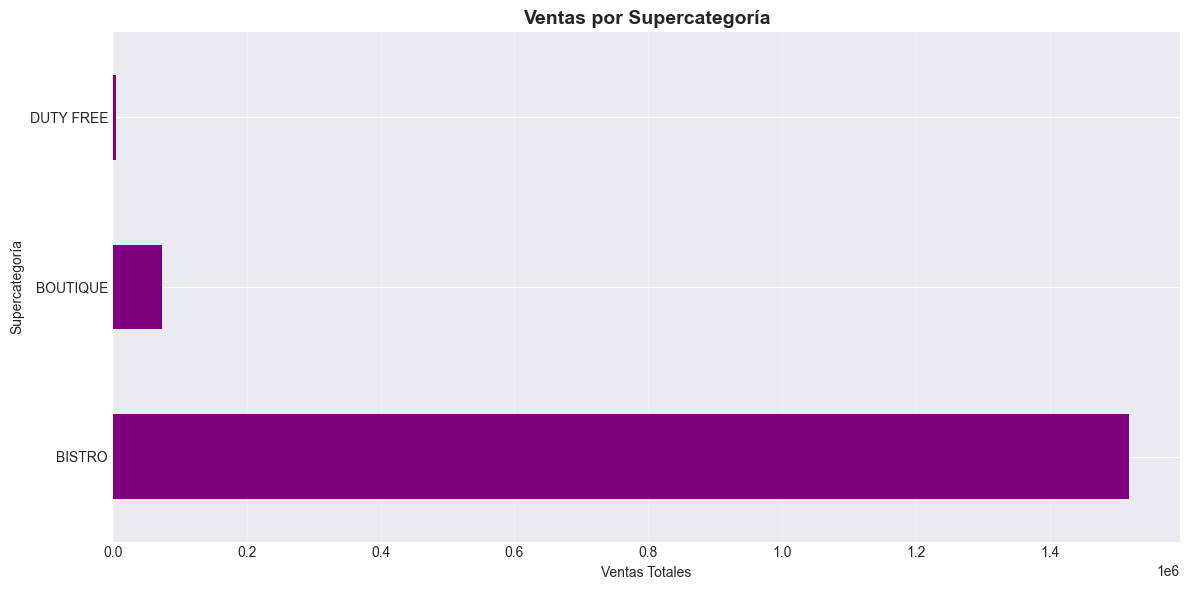


📦 Ventas por Supercategoría:
supercategory
BISTRO       1518500.0
BOUTIQUE       72809.0
DUTY FREE       5118.0
Name: sales, dtype: float64


In [ ]:
# Ventas por supercategoría
ventas_supercat = df.groupby('supercategory')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ventas_supercat.plot(kind='barh', color='purple')
plt.title('Ventas por Supercategoría', fontsize=14, fontweight='bold')
plt.xlabel('Ventas Totales')
plt.ylabel('Supercategoría')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n📦 Ventas por Supercategoría:")
print(ventas_supercat)

## 10. Análisis de Correlación

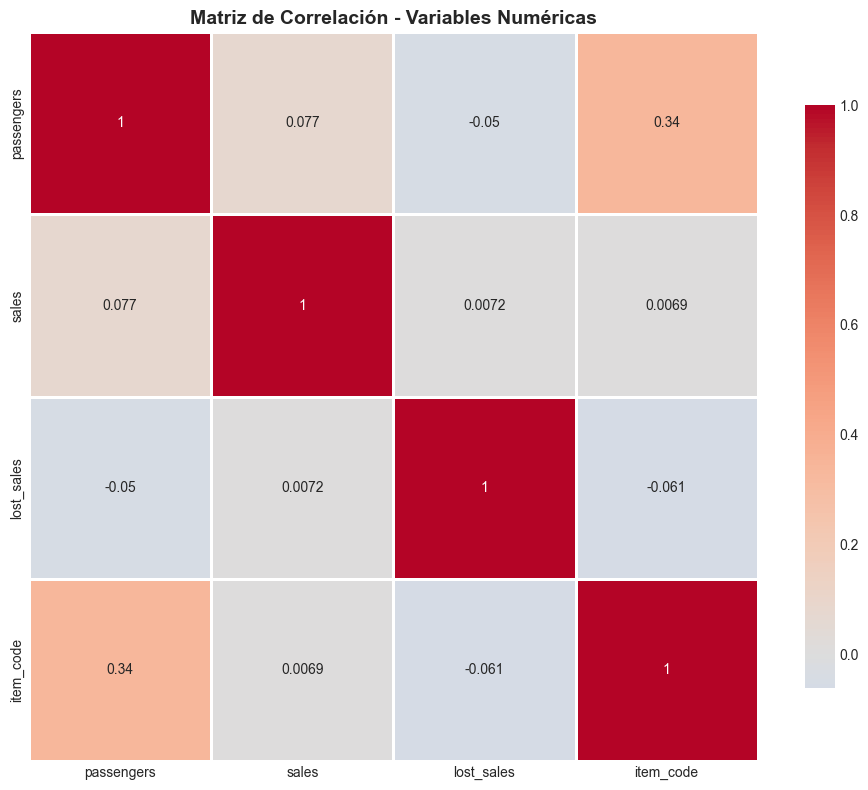

📊 Correlaciones:
            passengers     sales  lost_sales  item_code
passengers    1.000000  0.076785   -0.050250   0.342378
sales         0.076785  1.000000    0.007220   0.006854
lost_sales   -0.050250  0.007220    1.000000  -0.061048
item_code     0.342378  0.006854   -0.061048   1.000000


In [ ]:
# Matriz de correlación para variables numéricas
numeric_cols = ['passengers', 'sales', 'lost_sales', 'item_code']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Correlaciones:")
print(correlation_matrix)

## 11. Detección de Outliers

In [ ]:
# Detección de outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectar outliers en pasajeros
outliers_passengers, lower_p, upper_p = detect_outliers_iqr(df, 'passengers')
print(f"🔍 Outliers en Pasajeros:")
print(f"  - Total: {len(outliers_passengers)} ({len(outliers_passengers)/len(df)*100:.2f}%)")
print(f"  - Rango normal: [{lower_p:.0f}, {upper_p:.0f}]")

# Detectar outliers en ventas
outliers_sales, lower_s, upper_s = detect_outliers_iqr(df, 'sales')
print(f"\n🔍 Outliers en Ventas:")
print(f"  - Total: {len(outliers_sales)} ({len(outliers_sales)/len(df)*100:.2f}%)")
print(f"  - Rango normal: [{lower_s:.2f}, {upper_s:.2f}]")

🔍 Outliers en Pasajeros:
  - Total: 167014 (12.92%)
  - Rango normal: [42, 274]

🔍 Outliers en Ventas:
  - Total: 249206 (19.27%)
  - Rango normal: [1.00, 1.00]


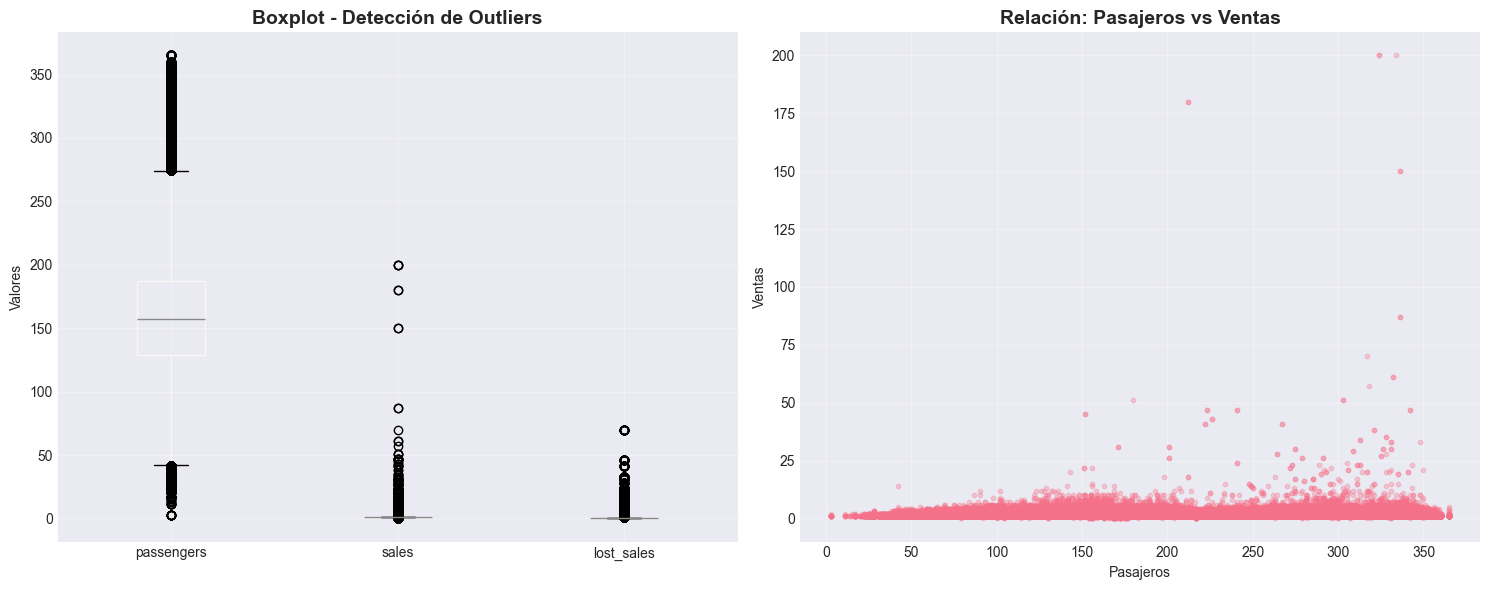

In [ ]:
# Visualización de outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot múltiple para variables numéricas
df[['passengers', 'sales', 'lost_sales']].boxplot(ax=axes[0])
axes[0].set_title('Boxplot - Detección de Outliers', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valores')
axes[0].grid(True, alpha=0.3)

# Scatter plot pasajeros vs ventas
axes[1].scatter(df['passengers'], df['sales'], alpha=0.3, s=10)
axes[1].set_title('Relación: Pasajeros vs Ventas', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Pasajeros')
axes[1].set_ylabel('Ventas')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Insights Clave y Conclusiones

In [ ]:
# Resumen de insights clave
print("="*80)
print("🎯 INSIGHTS CLAVE DEL ANÁLISIS")
print("="*80)

print(f"\n📊 VOLUMEN DE DATOS:")
print(f"  - Total de transacciones: {len(df):,}")
print(f"  - Período analizado: {df['fecha'].min().strftime('%Y-%m-%d')} a {df['fecha'].max().strftime('%Y-%m-%d')}")
print(f"  - Vuelos únicos: {df['flight_key'].nunique():,}")

print(f"\n✈️ PASAJEROS:")
print(f"  - Total de pasajeros: {df['passengers'].sum():,}")
print(f"  - Promedio por vuelo: {df['passengers'].mean():.0f}")
print(f"  - Mediana: {df['passengers'].median():.0f}")

print(f"\n💰 VENTAS:")
print(f"  - Ventas totales: {df['sales'].sum():,.2f}")
print(f"  - Venta promedio: {df['sales'].mean():.2f}")
print(f"  - Ventas perdidas totales: {df['lost_sales'].sum():,}")

print(f"\n🏪 WAREHOUSES:")
print(f"  - Número de warehouses: {df['warehouse'].nunique()}")
print(f"  - Warehouse con más ventas: {ventas_warehouse.idxmax()} ({ventas_warehouse.max():,.0f})")

print(f"\n📦 PRODUCTOS:")
print(f"  - Supercategorías: {df['supercategory'].nunique()}")
print(f"  - Categorías: {df['category'].nunique()}")
print(f"  - Productos únicos (item_code): {df['item_code'].nunique()}")

print(f"\n🌍 RUTAS:")
print(f"  - Orígenes únicos: {df['origen'].nunique()}")
print(f"  - Destinos únicos: {df['destino'].nunique()}")
print(f"  - Rutas únicas: {df['ruta'].nunique()}")
print(f"  - Ruta más frecuente: {top_rutas.index[0]} ({top_rutas.values[0]:,} vuelos)")

print("\n" + "="*80)

🎯 INSIGHTS CLAVE DEL ANÁLISIS

📊 VOLUMEN DE DATOS:
  - Total de transacciones: 1,293,077
  - Período analizado: 2025-01-01 a 2025-08-30
  - Vuelos únicos: 80,671

✈️ PASAJEROS:
  - Total de pasajeros: 219,579,558
  - Promedio por vuelo: 170
  - Mediana: 157

💰 VENTAS:
  - Ventas totales: 1,596,427.00
  - Venta promedio: 1.23
  - Ventas perdidas totales: 259,685

🏪 WAREHOUSES:
  - Número de warehouses: 4
  - Warehouse con más ventas: Lisbon (954,610)

📦 PRODUCTOS:
  - Supercategorías: 3
  - Categorías: 15
  - Productos únicos (item_code): 171

🌍 RUTAS:
  - Orígenes únicos: 86
  - Destinos únicos: 92
  - Rutas únicas: 288
  - Ruta más frecuente: LIS → LHR (41,948 vuelos)



## 📝 Próximos Pasos

Con este análisis exploratorio, ahora puedes:

1. **Análisis Predictivo**: Crear modelos de forecasting para predecir ventas
2. **Segmentación**: Agrupar rutas, productos o clientes por comportamiento
3. **Optimización**: Identificar oportunidades de mejora en rutas o productos con bajo rendimiento
4. **Análisis de Series de Tiempo**: Estudiar patrones estacionales y tendencias
5. **Dashboard**: Crear visualizaciones interactivas con Plotly o Streamlit

---
**Análisis completado** ✅

## 13. Análisis de Distribución de Item Code

In [ ]:
# Análisis de Item Code
print("="*80)
print("📦 ANÁLISIS DE ITEM CODE")
print("="*80)

print(f"\nTotal de item codes únicos: {df['item_code'].nunique()}")
print(f"Rango de valores: {df['item_code'].min():.0f} - {df['item_code'].max():.0f}")

# Estadísticas básicas
print("\n📊 Estadísticas descriptivas:")
print(df['item_code'].describe())

# Top 20 item codes más frecuentes
print("\n🔝 Top 20 Item Codes más frecuentes:")
top_items = df['item_code'].value_counts().head(20)
print(top_items)

📦 ANÁLISIS DE ITEM CODE

Total de item codes únicos: 171
Rango de valores: 4450 - 5112

📊 Estadísticas descriptivas:
count    1.293077e+06
mean     4.704604e+03
std      1.636256e+02
min      4.450000e+03
25%      4.585000e+03
50%      4.675000e+03
75%      4.728000e+03
max      5.112000e+03
Name: item_code, dtype: float64

🔝 Top 20 Item Codes más frecuentes:
item_code
4724.0    48600
4561.0    45424
4680.0    41265
4557.0    36595
4558.0    35655
4542.0    33921
4647.0    32344
4549.0    29064
4585.0    26368
4568.0    25759
4586.0    25471
5017.0    23895
4634.0    22568
4619.0    21875
4729.0    21282
4702.0    20695
4684.0    20474
5059.0    19983
4450.0    19834
4695.0    19627
Name: count, dtype: int64


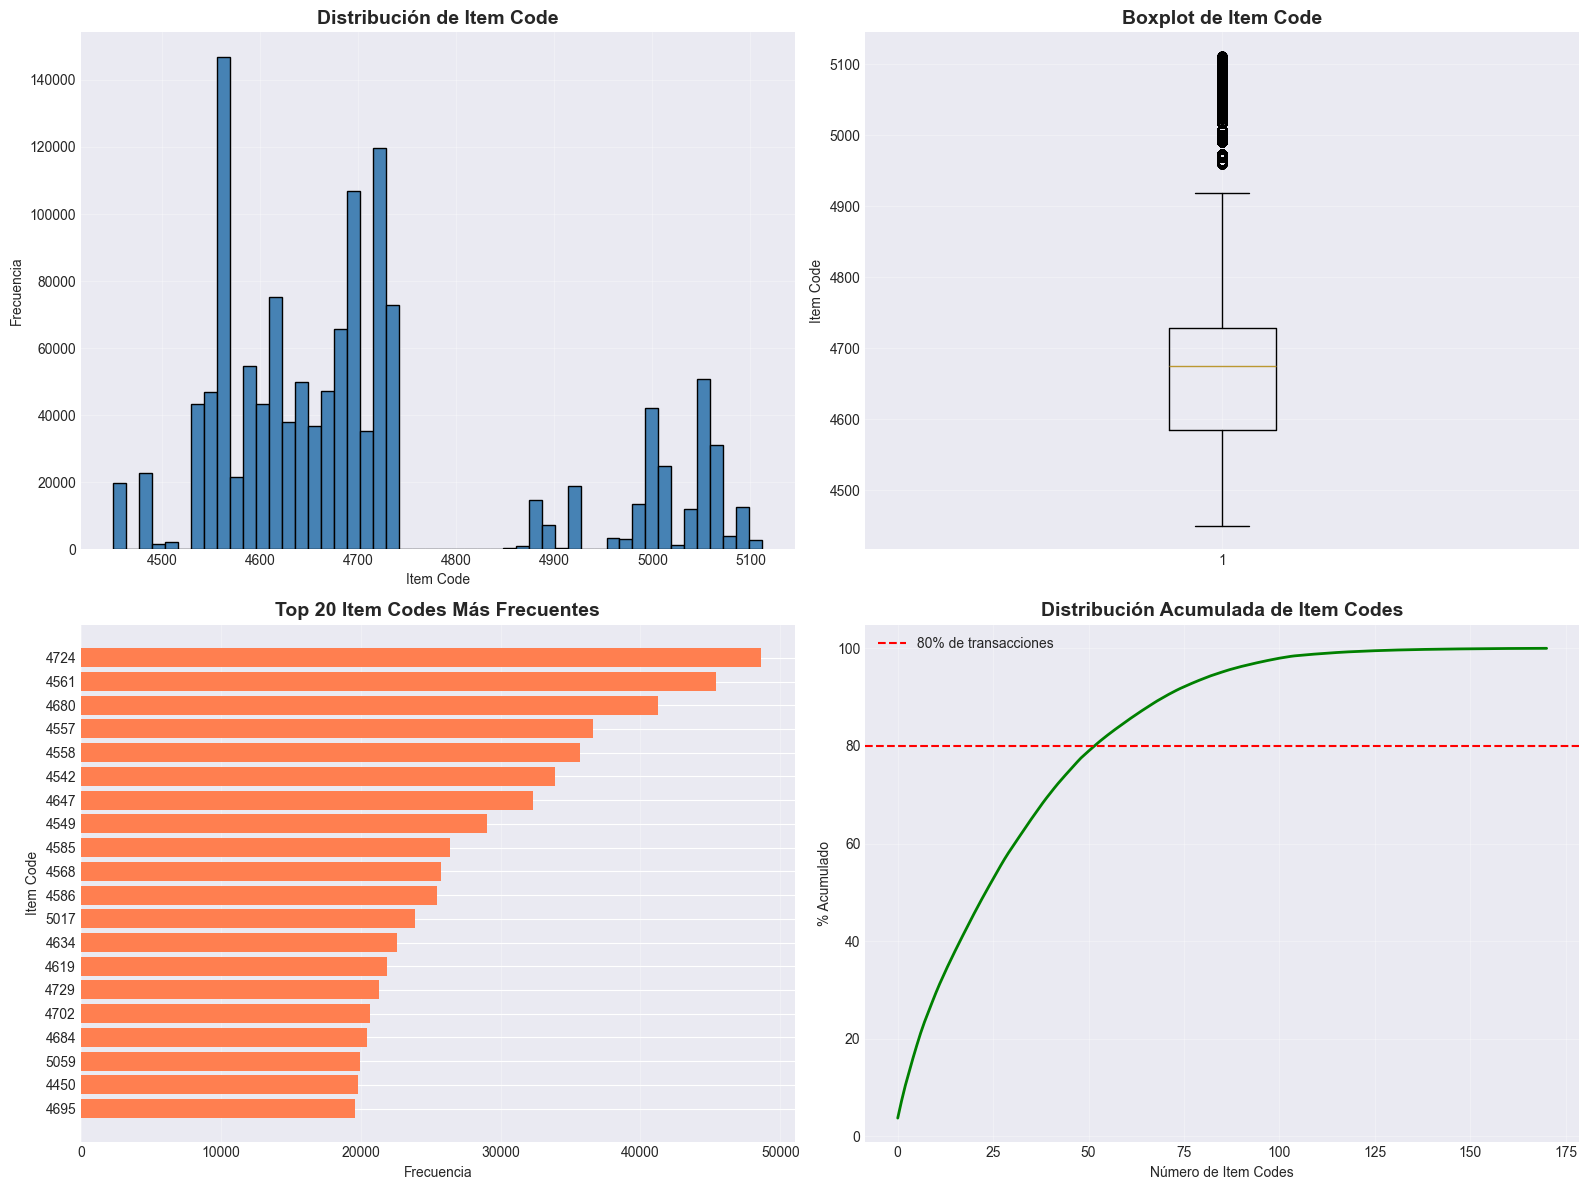


📈 52 item codes representan el 80% de las transacciones
   (Esto es el 30.4% del total de items)


In [ ]:
# Visualización 1: Distribución general de item_code
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma
axes[0, 0].hist(df['item_code'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Item Code', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Item Code')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Boxplot
axes[0, 1].boxplot(df['item_code'], vert=True)
axes[0, 1].set_title('Boxplot de Item Code', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Item Code')
axes[0, 1].grid(True, alpha=0.3)

# Top 20 más frecuentes (barras horizontales)
top_items = df['item_code'].value_counts().head(20)
axes[1, 0].barh(range(len(top_items)), top_items.values, color='coral')
axes[1, 0].set_yticks(range(len(top_items)))
axes[1, 0].set_yticklabels([f"{int(code)}" for code in top_items.index])
axes[1, 0].set_title('Top 20 Item Codes Más Frecuentes', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Frecuencia')
axes[1, 0].set_ylabel('Item Code')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()

# Distribución acumulada
item_counts = df['item_code'].value_counts().sort_values(ascending=False)
cumulative_pct = (item_counts.cumsum() / item_counts.sum() * 100)
axes[1, 1].plot(range(len(cumulative_pct)), cumulative_pct.values, color='green', linewidth=2)
axes[1, 1].set_title('Distribución Acumulada de Item Codes', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Número de Item Codes')
axes[1, 1].set_ylabel('% Acumulado')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=80, color='red', linestyle='--', label='80% de transacciones')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Calcular cuántos items representan el 80% de las transacciones
items_80_pct = (cumulative_pct <= 80).sum()
print(f"\n📈 {items_80_pct} item codes representan el 80% de las transacciones")
print(f"   (Esto es el {items_80_pct/df['item_code'].nunique()*100:.1f}% del total de items)")

💰 VENTAS POR ITEM CODE

Top 10 Item Codes por Ventas Totales:
           ventas_totales  venta_promedio  num_transacciones
item_code                                                   
4724.0            62973.0            1.30              48600
4561.0            61634.0            1.36              45424
4680.0            55409.0            1.34              41265
5017.0            54412.0            2.28              23895
4542.0            53686.0            1.58              33921
4557.0            44591.0            1.22              36595
4558.0            43769.0            1.23              35655
4647.0            42552.0            1.32              32344
4549.0            34635.0            1.19              29064
4568.0            30615.0            1.19              25759


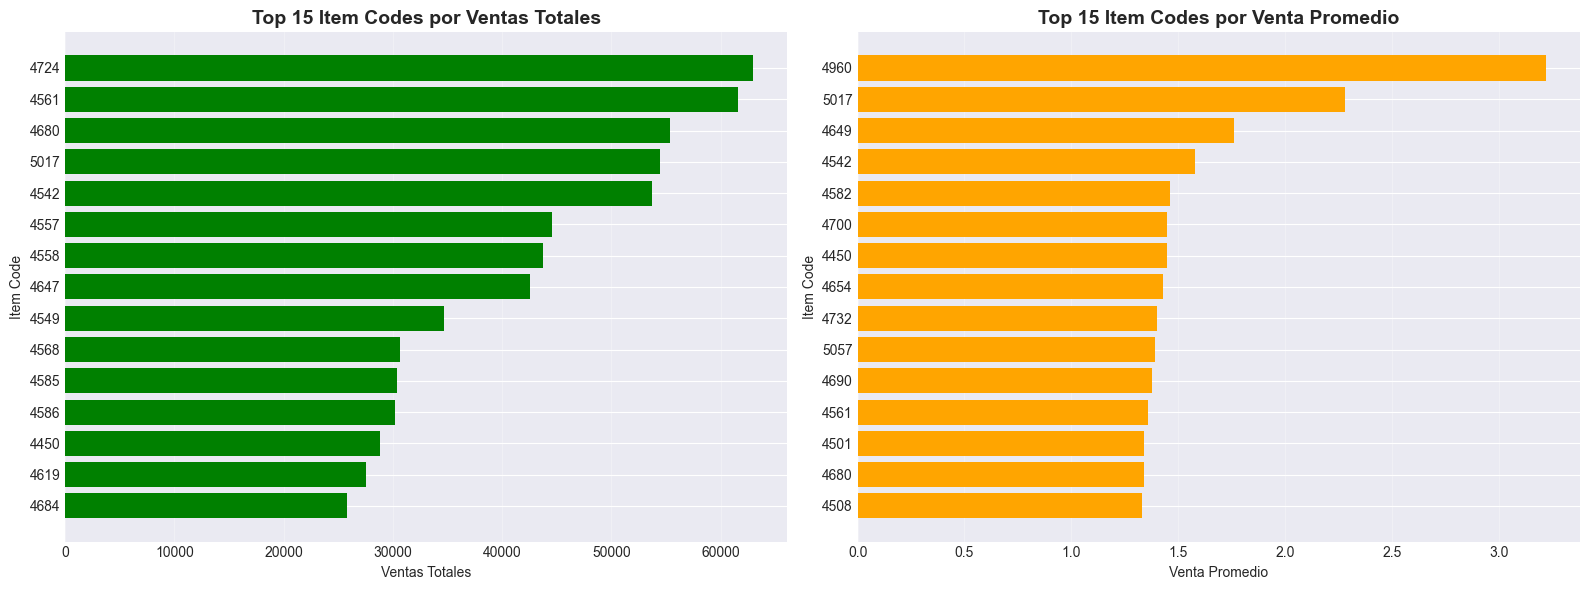

In [ ]:
# Análisis de ventas por item_code
print("="*80)
print("💰 VENTAS POR ITEM CODE")
print("="*80)

# Ventas totales por item code
ventas_por_item = df.groupby('item_code').agg({
    'sales': ['sum', 'mean', 'count']
}).round(2)

ventas_por_item.columns = ['ventas_totales', 'venta_promedio', 'num_transacciones']
ventas_por_item = ventas_por_item.sort_values('ventas_totales', ascending=False)

print("\nTop 10 Item Codes por Ventas Totales:")
print(ventas_por_item.head(10))

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 por ventas totales
top_ventas = ventas_por_item.head(15)
axes[0].barh(range(len(top_ventas)), top_ventas['ventas_totales'], color='green')
axes[0].set_yticks(range(len(top_ventas)))
axes[0].set_yticklabels([f"{int(code)}" for code in top_ventas.index])
axes[0].set_title('Top 15 Item Codes por Ventas Totales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ventas Totales')
axes[0].set_ylabel('Item Code')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Top 15 por venta promedio
top_promedio = ventas_por_item.sort_values('venta_promedio', ascending=False).head(15)
axes[1].barh(range(len(top_promedio)), top_promedio['venta_promedio'], color='orange')
axes[1].set_yticks(range(len(top_promedio)))
axes[1].set_yticklabels([f"{int(code)}" for code in top_promedio.index])
axes[1].set_title('Top 15 Item Codes por Venta Promedio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Venta Promedio')
axes[1].set_ylabel('Item Code')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

🔍 ANÁLISIS DE LOS 20 ITEM CODES MENOS FRECUENTES

📉 Top 20 Item Codes menos frecuentes:
item_code
4583.0    20
5111.0    22
5112.0    32
4649.0    33
4573.0    34
5079.0    48
5069.0    52
5053.0    53
5081.0    59
5074.0    70
5023.0    71
5109.0    72
5028.0    80
5027.0    85
5070.0    87
5082.0    87
5075.0    88
4960.0    90
5035.0    92
5110.0    99
Name: count, dtype: int64

💰 Información de ventas para items menos frecuentes:
           ventas_totales  venta_promedio  num_transacciones  total_pasajeros
item_code                                                                    
4583.0               20.0            1.00                 20             5892
5111.0               23.0            1.05                 22             6684
5112.0               33.0            1.03                 32             9838
4649.0               58.0            1.76                 33             9071
4573.0               34.0            1.00                 34             9875
5079.0          

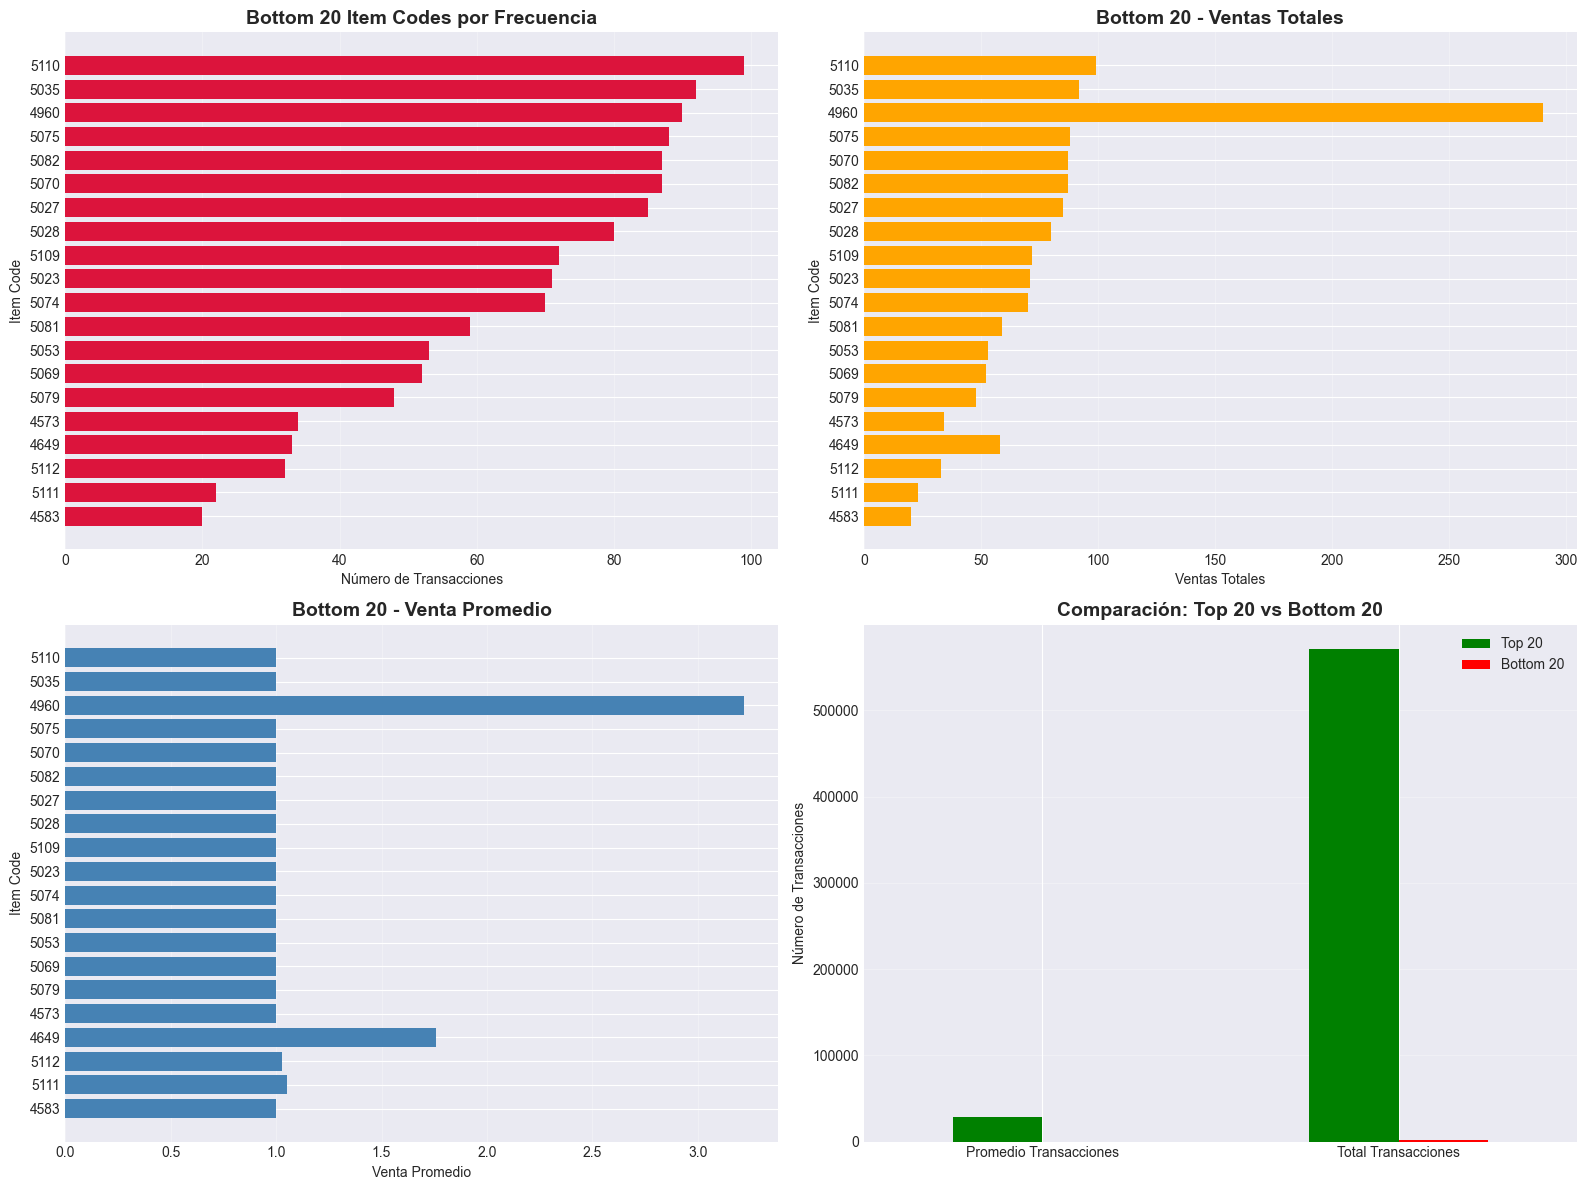


💡 INSIGHTS SOBRE ITEMS MENOS FRECUENTES:
Transacciones promedio (Bottom 20): 64
Transacciones promedio (Top 20): 28535
Diferencia: 448.0x más transacciones en Top 20

Ventas totales Bottom 20: 1501.00
Venta promedio Bottom 20: 1.15


In [ ]:
# Análisis de los 20 Item Codes MENOS frecuentes
print("="*80)
print("🔍 ANÁLISIS DE LOS 20 ITEM CODES MENOS FRECUENTES")
print("="*80)

# Bottom 20 item codes
bottom_items = df['item_code'].value_counts().tail(20)
print("\n📉 Top 20 Item Codes menos frecuentes:")
print(bottom_items.sort_values())

# Estadísticas de ventas para estos items
print("\n💰 Información de ventas para items menos frecuentes:")
ventas_bottom = df[df['item_code'].isin(bottom_items.index)].groupby('item_code').agg({
    'sales': ['sum', 'mean', 'count'],
    'passengers': 'sum'
}).round(2)

ventas_bottom.columns = ['ventas_totales', 'venta_promedio', 'num_transacciones', 'total_pasajeros']
ventas_bottom = ventas_bottom.sort_values('num_transacciones')

print(ventas_bottom)

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Frecuencia de bottom 20
axes[0, 0].barh(range(len(bottom_items)), bottom_items.sort_values().values, color='crimson')
axes[0, 0].set_yticks(range(len(bottom_items)))
axes[0, 0].set_yticklabels([f"{int(code)}" for code in bottom_items.sort_values().index])
axes[0, 0].set_title('Bottom 20 Item Codes por Frecuencia', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Número de Transacciones')
axes[0, 0].set_ylabel('Item Code')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: Ventas totales de bottom 20
axes[0, 1].barh(range(len(ventas_bottom)), ventas_bottom['ventas_totales'], color='orange')
axes[0, 1].set_yticks(range(len(ventas_bottom)))
axes[0, 1].set_yticklabels([f"{int(code)}" for code in ventas_bottom.index])
axes[0, 1].set_title('Bottom 20 - Ventas Totales', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Ventas Totales')
axes[0, 1].set_ylabel('Item Code')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Gráfico 3: Venta promedio de bottom 20
axes[1, 0].barh(range(len(ventas_bottom)), ventas_bottom['venta_promedio'], color='steelblue')
axes[1, 0].set_yticks(range(len(ventas_bottom)))
axes[1, 0].set_yticklabels([f"{int(code)}" for code in ventas_bottom.index])
axes[1, 0].set_title('Bottom 20 - Venta Promedio', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Venta Promedio')
axes[1, 0].set_ylabel('Item Code')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Comparación Top vs Bottom
all_items_freq = df['item_code'].value_counts()
top_20 = all_items_freq.head(20)
bottom_20 = all_items_freq.tail(20)

comparison_data = pd.DataFrame({
    'Top 20': [top_20.mean(), top_20.sum()],
    'Bottom 20': [bottom_20.mean(), bottom_20.sum()]
}, index=['Promedio Transacciones', 'Total Transacciones'])

comparison_data.plot(kind='bar', ax=axes[1, 1], color=['green', 'red'], rot=0)
axes[1, 1].set_title('Comparación: Top 20 vs Bottom 20', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Número de Transacciones')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()

# Insights adicionales
print("\n" + "="*80)
print("💡 INSIGHTS SOBRE ITEMS MENOS FRECUENTES:")
print("="*80)
print(f"Transacciones promedio (Bottom 20): {bottom_items.mean():.0f}")
print(f"Transacciones promedio (Top 20): {all_items_freq.head(20).mean():.0f}")
print(f"Diferencia: {all_items_freq.head(20).mean() / bottom_items.mean():.1f}x más transacciones en Top 20")
print(f"\nVentas totales Bottom 20: {ventas_bottom['ventas_totales'].sum():.2f}")
print(f"Venta promedio Bottom 20: {ventas_bottom['venta_promedio'].mean():.2f}")